#### Backtest code를 직접구현.

#### 기능명세 (Proto Type)
1. Market timing
2. 당일 거래량 상위종목 search (시장에 관심을 받는 종목)
3. 상위종목 중 이동평균선 정배열인 종목 search 
4. 비중 분할 (단순비중 or 확률기반 가중치)
5. 손절라인설정

#### 1. Market timing
* 코스피 지수 종가가 ma 20 이상일 때만 매매전략 발동  

In [59]:
import pandas as pd 
import matplotlib.pyplot as plt 

class MarketTimming():
    def df_pre(df,start,end):
        df['Date'] = pd.to_datetime(df['Date'])
        df = df[(df['Date'] >= start )&(df['Date']<=end)]
        df = df.set_index('Date')
        df['sma20'] = df['Close'].rolling(20).mean()
        df = df.dropna()
        df['timming'] = df['Close']>df['sma20']
        return df    

In [60]:
dd = MarketTimming()

In [62]:
df_kospi_raw = pd.read_csv('kospi_test.csv', index_col = 0)

In [65]:
dd.df_pre(df_kospi_raw,'2019-01-01')

TypeError: 'MarketTimming' object is not subscriptable

In [1]:
# 전처리함수
def df_pre(df,start, end):
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[(df['Date'] >= start )&(df['Date']<=end)]
    df = df.set_index('Date')
    df['sma20'] = df['Close'].rolling(20).mean()
    df = df.dropna()
    df['timming'] = df['Close']>df['sma20']
    return df

In [2]:
# 그래프함수
def back_plot(df):
    import matplotlib.pyplot as plt
    from matplotlib import dates
    plt.figure(figsize = (50, 10))
    plt.title("Kospi sma 20 ")
    plt.plot(df["Close"])
    plt.plot(df['sma20'])
    plt.scatter(df.loc[df['timming']==1].index, df['Close'][df['timming']==1],
                color = 'red',
                label='Go',
                marker ='^',
                alpha=0.8)
    plt.scatter(df.loc[df['timming']==0].index, df['Close'][df['timming']==0],
                color = 'blue',
                label='Stop',
                marker ='^',
                alpha=0.8)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()
    

In [3]:
import pandas as pd

In [58]:
# Data Load
df_kospi_raw = pd.read_csv('kospi_test.csv', index_col = 0)

In [5]:
# Data PreProcessing
df_kospi = df_pre(df_kospi_raw,'2015-01-01','2019-01-01')

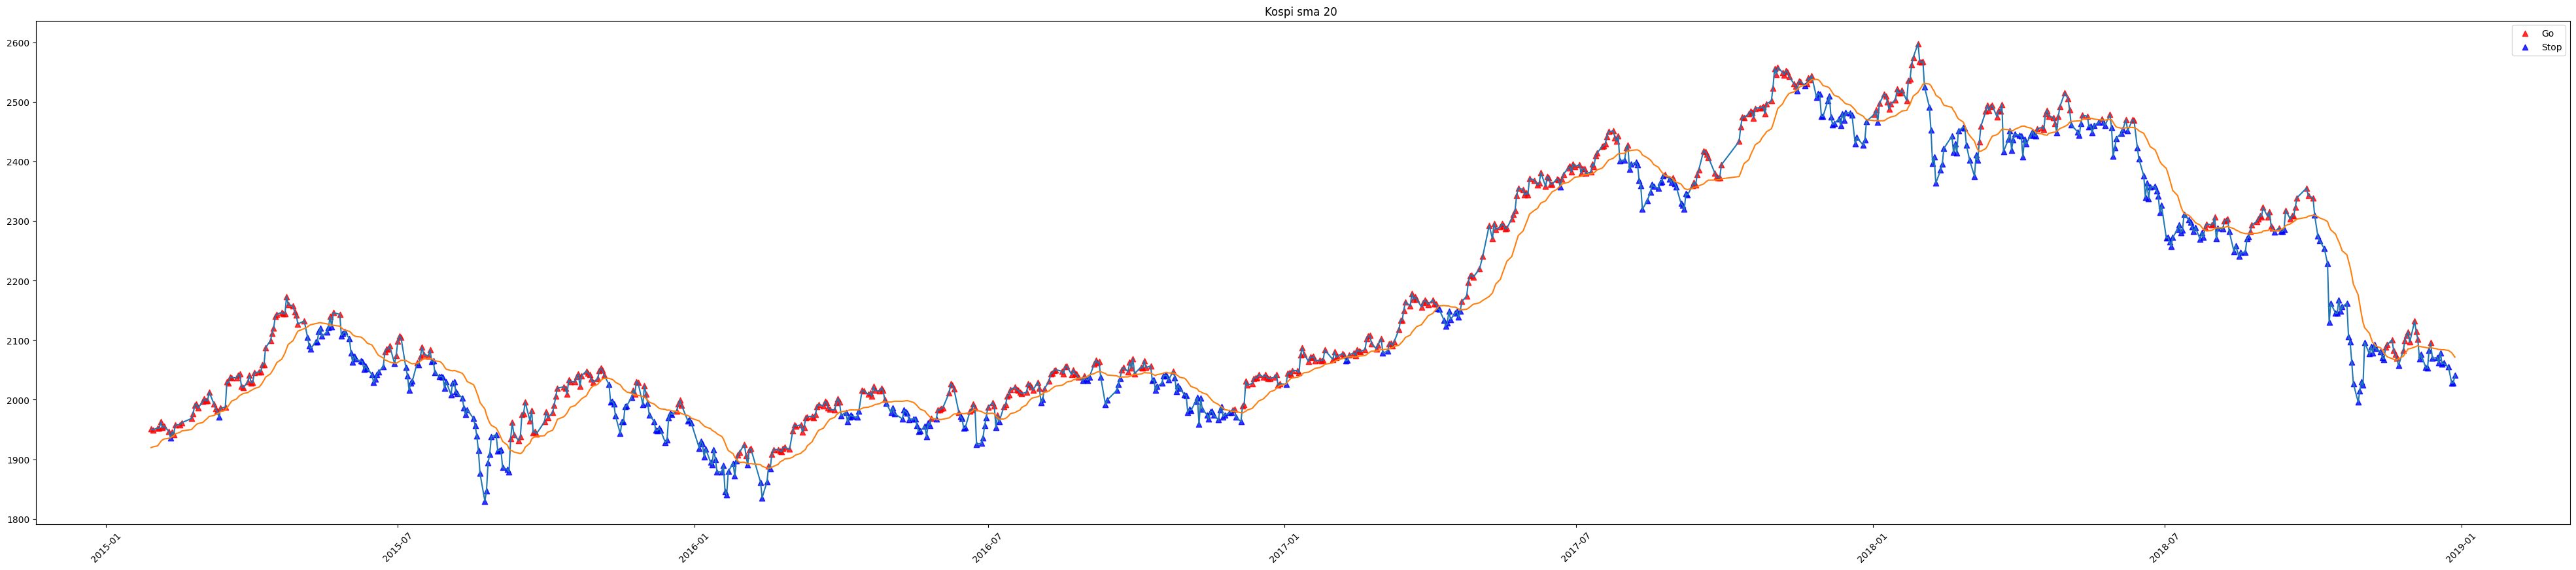

In [6]:
# Data Graph
back_plot(df_kospi)

In [7]:
df_kospi_mt = df_pre(df_kospi_raw,'2013-01-01','2022-12-31')

In [8]:
df_kospi_mt

,Open,High,Low,Close,Adj Close,Volume,sma20,timming
Date,,,,,,,,
2013-01-29,1946.109985,1958.880005,1944.810059,1955.959961,1955.959961,465000,1988.394995,False
2013-01-30,1961.920044,1967.290039,1950.670044,1964.430054,1964.430054,523300,1985.061499,False
2013-01-31,1960.780029,1965.920044,1954.530029,1961.939941,1961.939941,399600,1982.187994,False
2013-02-01,1964.750000,1966.540039,1942.439941,1957.790039,1957.790039,385900,1979.480499,False
2013-02-04,1968.949951,1969.130005,1952.829956,1953.209961,1953.209961,345400,1976.578497,False
...,...,...,...,...,...,...,...,...
2022-12-23,2325.860107,2333.080078,2311.899902,2313.689941,2313.689941,367000,2386.713000,False
2022-12-26,2312.540039,2321.919922,2304.199951,2317.139893,2317.139893,427600,2382.156494,False
2022-12-27,2327.520020,2335.989990,2321.479980,2332.790039,2332.790039,448300,2377.126501,False


In [ ]:
if df_kospi_mt >=True:
    start model 

#### 2. 당일 거래량 상위종목 (추후 거래대금으로 바뀔수도) Search

* 날짜별로 
* 전일대비 거래량 증가 하는종목 search


In [11]:
df_vol_search = pd.read_csv('C:\\Users\\smleo\\Desktop\\Ai\\PJT_Area\\4_SRC\\kospi200_raw.csv', index_col=0)

In [12]:
# 전일대비 거래량 Db 등록필요 predy_vrss_vol
df_vol_search['전일대비거래량상승률'] = round((df_vol_search['누적거래량'] - df_vol_search['누적거래량'].shift(1)) / df_vol_search['누적거래량'].shift(1) * 100,2)

In [13]:
# 전일대비 종가대비 증가율 db 등록필요 
df_vol_search['전일대비주가상승률'] = round((df_vol_search['종가'] - df_vol_search['종가'].shift(1)) / df_vol_search['종가'].shift(1) * 100,2)

In [14]:
df_vol_search.head(5)

,날짜,종가,시가,최고가,최저가,누적거래량,종목명,전일대비거래량상승률,전일대비주가상승률
60,2018-01-02,210500.0,212500.0,212500.0,208500.0,43076.0,BGF리테일,NaN,NaN
59,2018-01-03,202500.0,205500.0,208500.0,201500.0,39089.0,BGF리테일,-9.26,-3.80
58,2018-01-04,200500.0,203000.0,203500.0,200500.0,49743.0,BGF리테일,27.26,-0.99
57,2018-01-05,200000.0,202500.0,202500.0,196500.0,29452.0,BGF리테일,-40.79,-0.25
56,2018-01-08,199000.0,200000.0,201000.0,199000.0,26055.0,BGF리테일,-11.53,-0.50


In [16]:
df_vol_search[df_vol_search['날짜']=='2018-01-03'].sort_values(by='전일대비거래량상승률', ascending=False)

,날짜,종가,시가,최고가,최저가,누적거래량,종목명,전일대비거래량상승률,전일대비주가상승률
59,2018-01-03,5320.0,4545.0,5690.0,4505.0,22194916.0,금호타이어,1057.72,19.02
59,2018-01-03,41666.0,39666.0,41666.0,37999.0,172958.0,KG스틸,681.06,29.67
59,2018-01-03,15000.0,15200.0,15400.0,14800.0,120191.0,메리츠금융지주,639.05,-2.28
59,2018-01-03,8540.0,8060.0,8880.0,7960.0,2617845.0,신풍제약,482.28,7.42
59,2018-01-03,69400.0,68000.0,69500.0,67000.0,846812.0,롯데지주,421.57,5.95
...,...,...,...,...,...,...,...,...,...
59,2018-01-03,31950.0,31800.0,32350.0,31550.0,922887.0,강원랜드,-54.14,-0.31
59,2018-01-03,7726.0,7709.0,7794.0,7616.0,1586303.0,현대두산인프라코어,-55.51,0.55
59,2018-01-03,118500.0,118500.0,119000.0,118000.0,22067.0,현대홈쇼핑,-58.53,-0.42
59,2018-01-03,23180.0,23310.0,23440.0,23051.0,767101.0,대한항공,-63.43,-0.42


### 가설검증

* 전일대비 거래량 급등 = 주가 급락, 급등 모두 가능성을 가지고 있음 
* 검증해볼만한 점 : 거래량 급등은 급락, 급등 중 어느쪽이 확률이 높은가? 어느쪽이 상승률이높은가? 등 

#### Hypotheses 1 
가설 : 당일 거래량이 전일대비 상승했으면 당일 주가가 상승했었을 확률이 높다.  
Data 수 : 216,830  
범위 : Kospi200 5년치 Data 

전일대비 :   
( 거래상승률 + ) = 102,621   
( 거래상승률 + ) & ( 주가상승률 + ) = 53,643  

확률 : 52.27 %


In [17]:
con_1 = df_vol_search['전일대비거래량상승률'] >=0
con_2 = df_vol_search['전일대비주가상승률'] >=0

In [18]:
a = df_vol_search.loc[(con_1)].shape[0]
b = df_vol_search.loc[(con_1)&(con_2)].shape[0]
print(a,b)
print(round((b/a)*100,2),'%')

102621 53643
52.27 %


#### Hypotheses 2
가설 : 당일 거래량이 전일대비 상승했으면 다음날 주가가 상승할 확률이 높다.  
Data 수 : 216,830  
범위 : Kospi200 5년치 Data 

전일대비 :   
( 거래상승률 + ) = 102,621   
( 거래상승률 + ) & ( 주가상승률 + ) = 52,607

확률 : 51.26 %

In [19]:
con_1 = df_vol_search['전일대비거래량상승률'] >=0
con_2 = df_vol_search['전일대비주가상승률'].shift(-1) >=0

In [20]:
a = df_vol_search.loc[(con_1)].shape[0]
b = df_vol_search.loc[(con_1)&(con_2)].shape[0]
print(a,b)
print(round((b/a)*100,2),'%')

102621 52607
51.26 %


#### Result 
거래량 중요한 지표이지만 위 검증은 단순검증에 Data 도 적음  
중요한건 거래량변화가 어떤 패턴을 보일 때 진입해야 수익을 낼 수 있는지임  
우선 거래량 search 는 다양한 퀀트 전략을 참조 할 예정

 단순전략 :  거래량 증가율 상위 50종목 search

In [46]:
def vol_search(df,date,count):
    df_result = df[df['날짜']==date].sort_values(by='전일대비거래량상승률', ascending=False)[:count]
    return df_result

In [52]:
vol_search(df_vol_search,'2022-12-01',50)

,날짜,종가,시가,최고가,최저가,누적거래량,종목명,전일대비거래량상승률,전일대비주가상승률
20,2022-12-01,153500.0,153000.0,160000.0,149000.0,133867.0,대웅제약,726.54,4.07
20,2022-12-01,24000.0,21750.0,25000.0,21750.0,3529276.0,신풍제약,366.81,10.85
20,2022-12-01,54800.0,52500.0,55000.0,51900.0,276790.0,하나투어,248.11,6.61
20,2022-12-01,92600.0,98400.0,98400.0,91500.0,240011.0,두산,182.07,-4.83
20,2022-12-01,25000.0,24400.0,25150.0,24200.0,266277.0,신세계인터내셔날,131.98,3.52
20,2022-12-01,20850.0,20750.0,21700.0,20350.0,98699.0,대웅,124.15,2.71
20,2022-12-01,94000.0,93400.0,95000.0,93000.0,95360.0,키움증권,110.92,2.17
20,2022-12-01,34050.0,34150.0,35150.0,34050.0,84817.0,아이에스동서,95.02,-0.29
20,2022-12-01,241000.0,241000.0,242000.0,239000.0,70221.0,KCC,78.67,1.05
20,2022-12-01,5420.0,5470.0,5480.0,5260.0,2655580.0,팬오션,74.63,0.56
